In [1]:
import pandas as pd
import sys
import matplotlib
import matplotlib.pyplot as plt
import os

from scipy.stats.stats import pearsonr   

from sklearn import svm
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn import linear_model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors.nca import NeighborhoodComponentsAnalysis
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.manifold import TSNE


In [11]:
# load data
X = np.load('data_preparation/X_all.npy')
Y = np.load('data_preparation/Y_all.npy')
col_names = np.load('data_preparation/col_names_all.npy', allow_pickle=True)

col_names[:]


array(['ASGNUM', 'CLAIMS', 'INVSEQ', 'NBCITE', 'NUMAPP', 'NUMPAT',
       'PRIMINV', 'TEAM', 'NUMPRIM', 'NUMLONE', 'NUMCOINV', 'TOTAPP',
       'TEAMSIZE', 'CATEGORY_Aerospace', 'CATEGORY_Automotive',
       'CATEGORY_Chemicals and Biotechnology',
       'CATEGORY_Computers and Electronics', 'CATEGORY_Medical Equipment',
       'CATEGORY_Others', 'INVCOUNTRY_AE', 'INVCOUNTRY_AG',
       'INVCOUNTRY_AI', 'INVCOUNTRY_AL', 'INVCOUNTRY_AN', 'INVCOUNTRY_AR',
       'INVCOUNTRY_AT', 'INVCOUNTRY_AU', 'INVCOUNTRY_BB', 'INVCOUNTRY_BE',
       'INVCOUNTRY_BG', 'INVCOUNTRY_BH', 'INVCOUNTRY_BM', 'INVCOUNTRY_BN',
       'INVCOUNTRY_BO', 'INVCOUNTRY_BR', 'INVCOUNTRY_BS', 'INVCOUNTRY_CA',
       'INVCOUNTRY_CH', 'INVCOUNTRY_CL', 'INVCOUNTRY_CN', 'INVCOUNTRY_CO',
       'INVCOUNTRY_CR', 'INVCOUNTRY_CS', 'INVCOUNTRY_CY', 'INVCOUNTRY_CZ',
       'INVCOUNTRY_DD', 'INVCOUNTRY_DE', 'INVCOUNTRY_DK', 'INVCOUNTRY_DO',
       'INVCOUNTRY_EC', 'INVCOUNTRY_EG', 'INVCOUNTRY_ES', 'INVCOUNTRY_FI',
       'INVCOUNTR

In [20]:
corr = np.zeros((np.shape(X)[1], 2))
for i in range(np.shape(X)[1]):
    corr[i] = pearsonr(X[:,i], Y)

corr_sort_abs = -np.sort(-np.abs(corr), axis=0)


(1384648, 559)


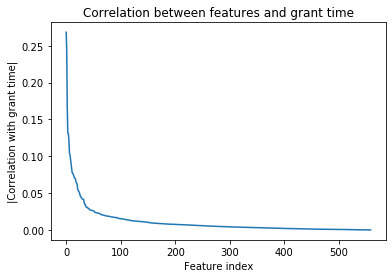

[0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 15, 16, 17, 18, 46, 66, 74, 126, 170, 173, 175, 181, 182, 184, 209, 216, 227, 246, 271, 276, 277, 278, 280, 298, 302, 308, 319, 373, 377, 379, 380, 381, 387, 389, 392, 393, 397, 398, 402, 407, 408, 409, 413, 417, 418, 441, 443, 445, 447, 454, 457, 469, 472, 486, 499, 502, 503, 506, 507, 509, 514, 517, 518, 522, 524, 526, 530, 532, 533, 534, 535, 536, 537, 538, 539, 540, 542, 543, 544, 545, 546, 547, 548, 549, 550, 551, 552, 554, 555, 556]
Correlation between a column and grant time: 
ASGNUM:0.26826588545261654
CLAIMS:0.13069015506165785
NBCITE:0.16640354097501736
NUMAPP:0.07301340295173725
NUMPAT:0.06562791587372659
PRIMINV:0.10224315721527451
TEAM:0.24428395449184112
NUMPRIM:0.04488476801134374
NUMLONE:0.09577769753522242
NUMCOINV:0.10422426202968872
TOTAPP:0.09063560252959628
TEAMSIZE:0.07079513683496659
CATEGORY_Automotive:0.029327871079804363
CATEGORY_Chemicals and Biotechnology:0.04331150540660989
CATEGORY_Computers and Electronics:0.131

In [24]:
print(np.shape(X))
plt.plot(range(np.shape(X)[1]), corr_sort_abs[:,0])

plt.title('Correlation between features and grant time')
plt.xlabel('Feature index')
plt.ylabel('|Correlation with grant time|')
plt.gcf().savefig('correlation.png')
plt.show()

high_corr_idx = [i for i in range(np.shape(X)[1]) if np.abs(corr)[i][0] > 0.015]
print(high_corr_idx)

print("Correlation between a column and grant time: ")
for i in range(len(high_corr_idx)):
    print(str(col_names[high_corr_idx[i]]) + ":" + str(np.abs(corr)[high_corr_idx[i]][0]))


In [4]:
# Define models

clf = linear_model.LinearRegression()
# clf = linear_model.Ridge()
# clf = svm.SVR()

X = X[:, high_corr_idx]

K = 5
print('Performing ' + str(K) + '-fold cross validation')
rmse = []
for k in range(K):# performing K fold validation
    print('Fold_num = ' + str(k))
    training_rows = [i for i in range(len(X)) if i%K!=k]
    Xtrain = X[training_rows] # training
    ytrain = Y[training_rows]
    testing_rows = [i for i in range(len(X)) if i%K==k]
    Xtest = X[testing_rows] # taking every k'th example for test
    ytest = Y[testing_rows]
    print('--------------------------------------------------------------')
    clf.fit(Xtrain, ytrain)
    ypred = clf.predict(Xtest)
    rmse.append(mean_squared_error(ytest, ypred)**0.5)
    print('test rmse = '+str(rmse[k]) )
    print('------------------------------------------------------------')
print("Averate rmse: " + str(np.average(rmse)))

Performing 5-fold cross validation
Fold_num = 0
--------------------------------------------------------------
test rmse = 374.1695021793809
------------------------------------------------------------
Fold_num = 1
--------------------------------------------------------------
test rmse = 378.6994961384519
------------------------------------------------------------
Fold_num = 2
--------------------------------------------------------------
test rmse = 373.42642691510736
------------------------------------------------------------
Fold_num = 3
--------------------------------------------------------------
test rmse = 374.9966131486627
------------------------------------------------------------
Fold_num = 4
--------------------------------------------------------------
test rmse = 377.3863696202782
------------------------------------------------------------
Averate rmse: 375.7356816003762


In [5]:
# load data
X = np.load('data_preparation/X.npy')
Y = np.load('data_preparation/Y.npy')
col_names = np.load('data_preparation/col_names.npy', allow_pickle=True)

# X = X[:8000]
# Y = Y[:8000]
print(np.shape(X))
print(np.shape(Y))

(70885, 474)
(70885,)
